# _Feature Engineering_

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from scipy.stats import chi2_contingency
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\Apeksha\Documents\data_proj\anime_dataset.csv')

### This is the original dataset

In [4]:
df.head()

,Serial No.,Name,Links,Genre and Theme,No. of episodes,Rating
0,1,Fullmetal Alchemist: Brotherhood (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,fantasy,thriller,alchem...",64,9.09
1,2,Steins;Gate (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,mystery,psychological,r...",24,9.04
2,3,Clannad After Story (TV),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,psychological,romance,supernatura...",25,9.04
3,4,your name. (movie),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,romance,supernatural,amnesia,body...",1,9.02
4,5,Rurouni Kenshin: Trust &amp; Betrayal (OAV),https://www.animenewsnetwork.com//encyclopedia...,"action,drama,romance,historical,revenge,samura...",4,8.97


### - Since the dataset contains **tv shows** as well as **movies**, we can use ```categorical encoding``` for the same. 
### - For this I made a new column **TV Shows** that is 1 for the rows having tv shows and 0 for movies. 
###   **How will this help?** 
### - Adding the new column will help us analyse the ratings of every anime accurately as it may depend on whether it's a tv show or a movie. 

In [5]:

df["TV show"] = np.where(df["No. of episodes"]==1, 0, 1)
df.head()

,Serial No.,Name,Links,Genre and Theme,No. of episodes,Rating,TV show
0,1,Fullmetal Alchemist: Brotherhood (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,fantasy,thriller,alchem...",64,9.09,1
1,2,Steins;Gate (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,mystery,psychological,r...",24,9.04,1
2,3,Clannad After Story (TV),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,psychological,romance,supernatura...",25,9.04,1
3,4,your name. (movie),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,romance,supernatural,amnesia,body...",1,9.02,0
4,5,Rurouni Kenshin: Trust &amp; Betrayal (OAV),https://www.animenewsnetwork.com//encyclopedia...,"action,drama,romance,historical,revenge,samura...",4,8.97,1


### - Now I've used ```categorical encoding``` on the Top 9 genres
### - For that, I've extracted the Top 9 genres from the **'Genre and Theme'** column

In [6]:
df['test'] = df['Genre and Theme'].str.split(',').str[0]
df['test'].value_counts()


drama              28
adventure          23
action             22
comedy             19
slice of life       4
horror              1
mystery             1
science fiction     1
boxing              1
Name: test, dtype: int64

In [7]:
df['test1'] = df['Genre and Theme'].str.split(',').str[1]
df['test2'] = df['Genre and Theme'].str.split(',').str[2]
df['test3'] = df['Genre and Theme'].str.split(',').str[3]

In [8]:
top=list(df['test'].unique()[:3])
top+=list(df['test1'].unique()[:3])
top+=list(df['test2'].unique()[:3])
top+=list(df['test3'].unique()[:3])

### - Here are the Top 9 genres

In [9]:
top=list(set(top))
top

['drama',
 'magic',
 'mystery',
 'romance',
 'fantasy',
 'adventure',
 'comedy',
 'action',
 'psychological']

In [10]:
for i in top: 
    df['Genre: '+i] = np.where(df["Genre and Theme"].str.contains(i), 1, 0)

In [11]:
df.columns

Index(['Serial No.', 'Name', 'Links', 'Genre and Theme', 'No. of episodes',
       'Rating', 'TV show', 'test', 'test1', 'test2', 'test3', 'Genre: drama',
       'Genre: magic', 'Genre: mystery', 'Genre: romance', 'Genre: fantasy',
       'Genre: adventure', 'Genre: comedy', 'Genre: action',
       'Genre: psychological'],
      dtype='object')

In [12]:
df.head()

,Serial No.,Name,Links,Genre and Theme,No. of episodes,Rating,TV show,test,test1,test2,test3,Genre: drama,Genre: magic,Genre: mystery,Genre: romance,Genre: fantasy,Genre: adventure,Genre: comedy,Genre: action,Genre: psychological
0,1,Fullmetal Alchemist: Brotherhood (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,fantasy,thriller,alchem...",64,9.09,1,adventure,comedy,drama,fantasy,1,0,0,0,1,1,1,0,0
1,2,Steins;Gate (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,mystery,psychological,r...",24,9.04,1,adventure,comedy,drama,mystery,1,0,1,1,0,1,1,0,1
2,3,Clannad After Story (TV),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,psychological,romance,supernatura...",25,9.04,1,comedy,drama,psychological,romance,1,0,0,1,0,0,1,0,1
3,4,your name. (movie),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,romance,supernatural,amnesia,body...",1,9.02,0,comedy,drama,romance,supernatural,1,0,0,1,0,0,1,0,0
4,5,Rurouni Kenshin: Trust &amp; Betrayal (OAV),https://www.animenewsnetwork.com//encyclopedia...,"action,drama,romance,historical,revenge,samura...",4,8.97,1,action,drama,romance,historical,1,0,0,1,0,0,0,1,0


In [13]:
df=df.drop(['test','test1','test2','test3'],axis=1)

In [14]:
df.head()

,Serial No.,Name,Links,Genre and Theme,No. of episodes,Rating,TV show,Genre: drama,Genre: magic,Genre: mystery,Genre: romance,Genre: fantasy,Genre: adventure,Genre: comedy,Genre: action,Genre: psychological
0,1,Fullmetal Alchemist: Brotherhood (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,fantasy,thriller,alchem...",64,9.09,1,1,0,0,0,1,1,1,0,0
1,2,Steins;Gate (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,mystery,psychological,r...",24,9.04,1,1,0,1,1,0,1,1,0,1
2,3,Clannad After Story (TV),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,psychological,romance,supernatura...",25,9.04,1,1,0,0,1,0,0,1,0,1
3,4,your name. (movie),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,romance,supernatural,amnesia,body...",1,9.02,0,1,0,0,1,0,0,1,0,0
4,5,Rurouni Kenshin: Trust &amp; Betrayal (OAV),https://www.animenewsnetwork.com//encyclopedia...,"action,drama,romance,historical,revenge,samura...",4,8.97,1,1,0,0,1,0,0,0,1,0


In [15]:
df=df[['Serial No.', 'Name', 'Links', 'Genre and Theme', 'No. of episodes','TV show','Genre: magic',
       'Genre: adventure', 'Genre: psychological', 'Genre: comedy',
       'Genre: drama', 'Genre: romance', 'Genre: mystery', 'Genre: action',
       'Genre: fantasy','Rating']]

### This is our final dataset

In [16]:
df.head()

,Serial No.,Name,Links,Genre and Theme,No. of episodes,TV show,Genre: magic,Genre: adventure,Genre: psychological,Genre: comedy,Genre: drama,Genre: romance,Genre: mystery,Genre: action,Genre: fantasy,Rating
0,1,Fullmetal Alchemist: Brotherhood (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,fantasy,thriller,alchem...",64,1,0,1,0,1,1,0,0,0,1,9.09
1,2,Steins;Gate (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,mystery,psychological,r...",24,1,0,1,1,1,1,1,1,0,0,9.04
2,3,Clannad After Story (TV),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,psychological,romance,supernatura...",25,1,0,0,1,1,1,1,0,0,0,9.04
3,4,your name. (movie),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,romance,supernatural,amnesia,body...",1,0,0,0,0,1,1,1,0,0,0,9.02
4,5,Rurouni Kenshin: Trust &amp; Betrayal (OAV),https://www.animenewsnetwork.com//encyclopedia...,"action,drama,romance,historical,revenge,samura...",4,1,0,0,0,0,1,1,0,1,0,8.97


# _Hypothesis Testing_ 
## 1. Chi Squared Test of independency
### - Here we assume that all the genres are independent from each other. If our p value comes less than 0.05 (p<0.05) we will reject the hypothesis, showing that the genres are **not independent** from each other. 

In [33]:
for i in df[df.columns[6:15]]:
  for j in df[df.columns[7:15]]:
        cont=pd.crosstab(df[i],df[j])
        c, p, dof, expected = chi2_contingency(cont)
        if p<0.05 and i!=j:
          print(p,end=" ")
          print(i+" "+j)

0.00255324054949839 Genre: magic Genre: psychological
0.005221018534965061 Genre: adventure Genre: action
1.5689508612406957e-05 Genre: adventure Genre: fantasy
0.00909825458161699 Genre: psychological Genre: mystery
0.012165112025984968 Genre: romance Genre: action
0.00909825458161699 Genre: mystery Genre: psychological
0.005221018534965061 Genre: action Genre: adventure
0.012165112025984968 Genre: action Genre: romance
1.5689508612406957e-05 Genre: fantasy Genre: adventure


### The above output shows all of the genres that are dependent on each other. It includes: 
### - Magic and Psychological 
### - Adventure and Action 
### - Adventure and Fantasy 
### - Psychological and Mystery 
### - Romance and Action 
### Hence we plot a graph for analysis

<AxesSubplot:xlabel='Genre: action', ylabel='Genre: adventure'>

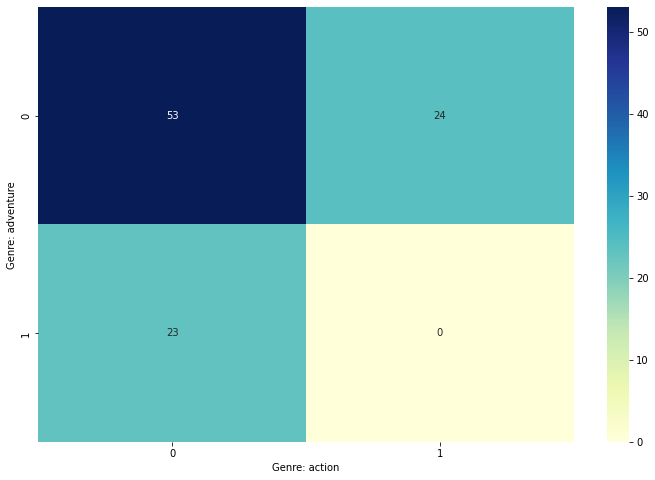

In [22]:
cont=pd.crosstab(df['Genre: adventure'],df['Genre: action'])
c, p, dof, expected = chi2_contingency(cont)
plt.figure(figsize=(12,8))
sns.heatmap(cont, annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='Genre: action', ylabel='Genre: romance'>

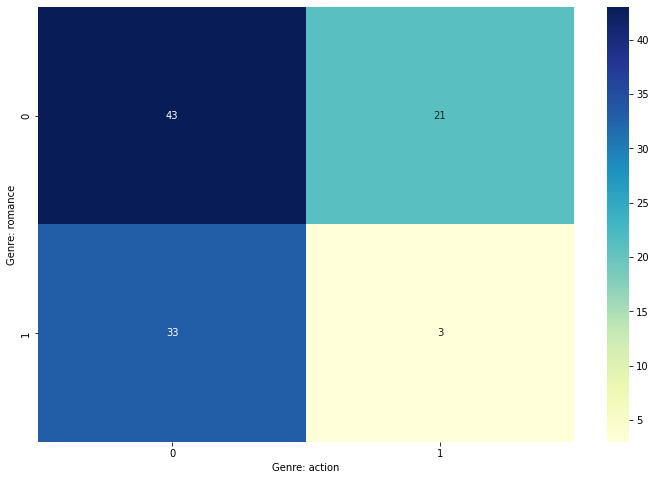

In [23]:
cont=pd.crosstab(df['Genre: romance'],df['Genre: action'])
c, p, dof, expected = chi2_contingency(cont)
plt.figure(figsize=(12,8))
sns.heatmap(cont, annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='Genre: mystery', ylabel='Genre: psychological'>

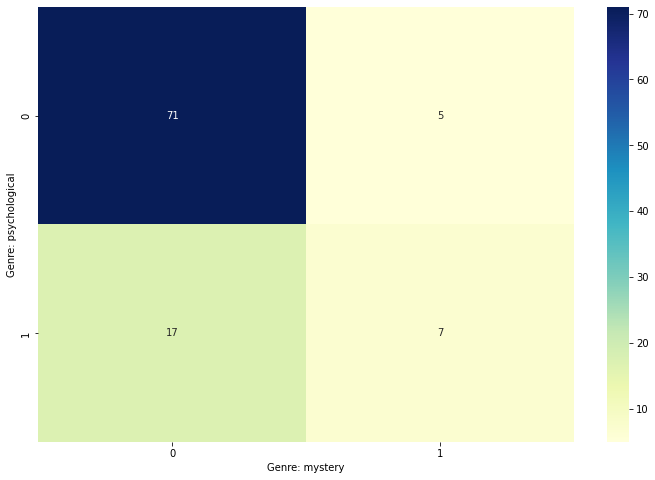

In [24]:
cont=pd.crosstab(df['Genre: psychological'],df['Genre: mystery'])
c, p, dof, expected = chi2_contingency(cont)
plt.figure(figsize=(12,8))
sns.heatmap(cont, annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='Genre: magic', ylabel='Genre: psychological'>

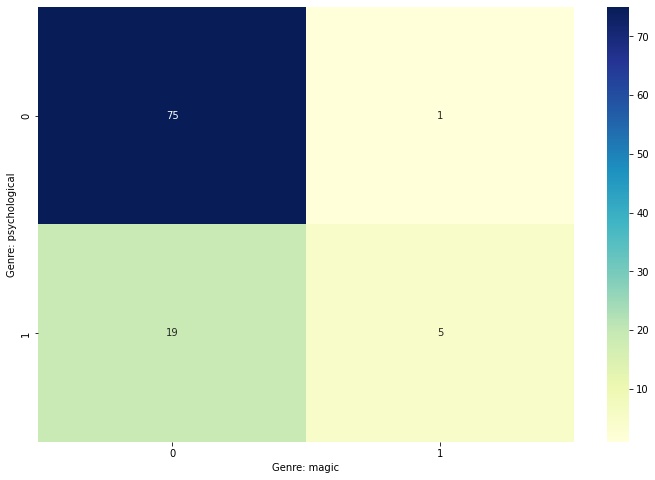

In [25]:
cont=pd.crosstab(df['Genre: psychological'],df['Genre: magic'])
c, p, dof, expected = chi2_contingency(cont)
plt.figure(figsize=(12,8))
sns.heatmap(cont, annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='Genre: fantasy', ylabel='Genre: adventure'>

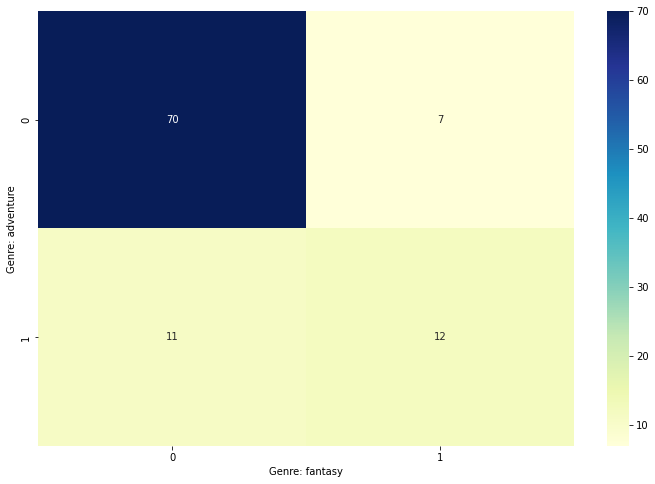

In [26]:
cont=pd.crosstab(df['Genre: adventure'],df['Genre: fantasy'])
c, p, dof, expected = chi2_contingency(cont)
plt.figure(figsize=(12,8))
sns.heatmap(cont, annot=True, cmap="YlGnBu")

### Here, we get a very apparent conclusion: 
### - For all of the above graphs the majority of the anime lies the **dark blue** section. 
###   This shows that the absence of these genres together give a high probability of the anime coming under **Top 100**

In [35]:
from scipy.stats import f_oneway
for i in df[df.columns[6:15]]:
    CategoryGroupLists=df.groupby(i)['Rating'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    if(AnovaResults[1]<0.05):
        print(i,end=" ")
        print('P-Value: ', AnovaResults[1])

Genre: psychological P-Value:  0.015122949454533517


## 2. Anova Test (Using F-Test on One-Way Anova)
### - Here we assume that the features **Genre** and **Rating** are independent from each other. 
### - In this above cell you can see that the p value is less than 0.05 only for the genre Psychological, which concludes that the assumption is **true** for every other genre except **Psychological**.

In [37]:
df['Genre: psychological'].value_counts()

0    76
1    24
Name: Genre: psychological, dtype: int64

### Since the absence of Psychological genre is more than 75% it proves that it this genre is not as much popular among the audience